## CS 498 AML HW 3<br>
Kenneth Zhang (kfzhang2)<br>
Kirsten Wong (kewong2)<br>
Roshan Rajan (rjrajan2)<br>

4.10. CIFAR-10 is a dataset of 32x32 images in 10 categories, collected by Alex
Krizhevsky, Vinod Nair, and Geoffrey Hinton. It is often used to evaluate
machine learning algorithms. You can download this dataset from https://www.cs.toronto.edu/∼kriz/cifar.html.

## Initialization
Here, we read in the training examples and combine them into a single matrix. We also combine their respective labels into a vector, in the same order corresponding to the examples.

In [99]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [100]:
# Method for loading image data into dictionary.
def unpickle(file):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict

In [3]:
# Loads data from cifar folder into dictionary. (Make sure folder is in same directory as this notebook.)
import os
dirname = os.getcwd()

# Load entire batch; each has 10,000 images and labels. Maybe combine them into one matrix?
db1 = unpickle(dirname+'/cifar-10-batches-py/data_batch_1')
db2 = unpickle(dirname+'/cifar-10-batches-py/data_batch_2')
db3 = unpickle(dirname+'/cifar-10-batches-py/data_batch_3')
db4 = unpickle(dirname+'/cifar-10-batches-py/data_batch_4')
db5 = unpickle(dirname+'/cifar-10-batches-py/data_batch_5')

# Load test batch
testb = unpickle(dirname+'/cifar-10-batches-py/test_batch')

In [101]:
# Combine examples and labels into their own matrices

all_data = np.concatenate((db1['data'],db2['data']),0)
all_data = np.concatenate((all_data,db3['data']),0)
all_data = np.concatenate((all_data,db4['data']),0)
all_data = np.concatenate((all_data,db5['data']),0)

all_lbls = np.concatenate((db1['labels'],db2['labels']),0)
all_lbls = np.concatenate((all_lbls,db3['labels']),0)
all_lbls = np.concatenate((all_lbls,db4['labels']),0)
all_lbls = np.concatenate((all_lbls,db5['labels']),0)


In [119]:
# Reshapes RGB array, converts to uint8, and displays image
def printImg(data):
    im = np.reshape(data,(3,1024))
    im = np.transpose(im)
    im.shape
    im = np.reshape(im,(32,32,3))
    im.astype('uint8')
    plt.imshow(im, interpolation='nearest')
    plt.figure()

In [103]:
# Dataset size
d_size = 50000

### Problem 4.10 a
The code below computes the mean image for each category.

In [104]:
# ==============
# Problem 4.10 a
# ==============

# (a) For each category, compute the mean image and the first 20 principal
# components. Plot the error resulting from representing the images of each
# category using the first 20 principal components against the category.

# Loop through batches to find mean image
curr_total = np.zeros((10,3072))
curr_matches = np.zeros(10)

for i in range(0,d_size):
    curr_total[all_lbls[i]] += all_data[i]
    curr_matches[all_lbls[i]] += 1



The mean images for each category are displayed below. We note that there is little detail present in the mean images, and that the colors are grayed out, likely due to the varied backgrounds and variety of positions in which the objects can be found.

[ 115.0976  114.2104  114.7332 ...,  101.7988  101.6314  102.0214]


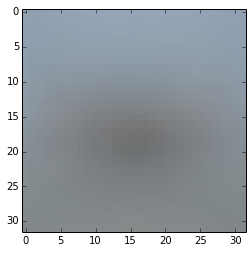

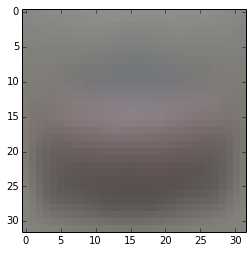

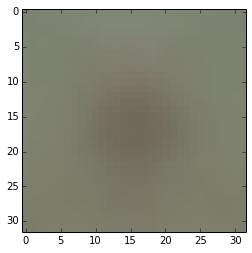

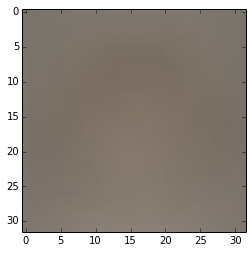

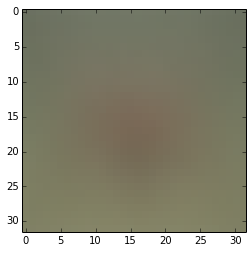

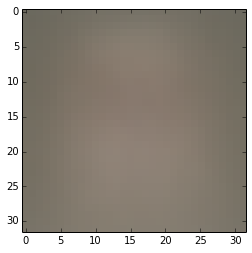

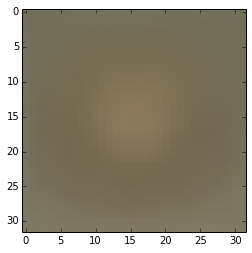

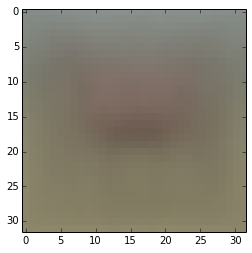

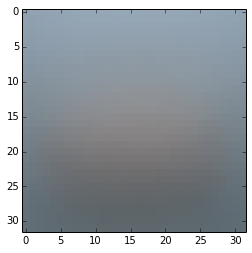

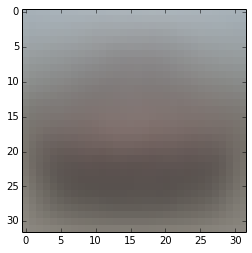

In [105]:
for i in range(0,curr_total.shape[0]):
    curr_total[i] /= curr_matches[i]

print curr_total[all_lbls[0]]
    
curr_total = curr_total.astype('uint8')    
       

    
for i in range(0,curr_total.shape[0]):
    printImg(curr_total[i])
    

In [97]:
# Separate all_data by label

all_data_lbls = np.zeros((10, 5000, 3072))

for lbl in range(0, 10):
    lbl_idxs = [x for x in range(0,all_lbls.shape[0]) if all_lbls[x] == lbl]
    for i in range(0,len(lbl_idxs)):
        all_data_lbls[lbl][i] += all_data[lbl_idxs[i]]
    

The following code creates a PCA object for each category which produces a representation of an input image by the first 20 principal components for the category.

In [111]:
# ==============
# Problem 4.10 a (continued)
# ==============

# Run PCA on dataset, 
from sklearn import decomposition



pca_0 = decomposition.PCA(n_components = 20)
pca_1 = decomposition.PCA(n_components = 20)
pca_2 = decomposition.PCA(n_components = 20)
pca_3 = decomposition.PCA(n_components = 20)
pca_4 = decomposition.PCA(n_components = 20)
pca_5 = decomposition.PCA(n_components = 20)
pca_6 = decomposition.PCA(n_components = 20)
pca_7 = decomposition.PCA(n_components = 20)
pca_8 = decomposition.PCA(n_components = 20)
pca_9 = decomposition.PCA(n_components = 20)

pcas = [pca_0, pca_1, pca_2, pca_3, pca_4, pca_5, pca_6, pca_7, pca_8, pca_9]

for i in range(len(pcas)):
    pcas[i].fit(all_data_lbls[i])




In [ ]:
def applyPCA(img,pca):
    pca_im = pca.transform(img)
    pca_reim = pca.inverse_transform(pca_im)
    return pca_reim
    
def dispImg(img):
    printImg(img.astype('uint8'))
    
def applyAndPrint(img,pca):
    im = applyPCA(img,pca)
    dispImg(im)

applyAndPrint(all_data_lbls[1][0],pca_1)

Shown below: An image from the automobile category.

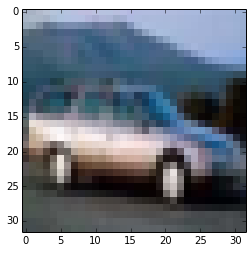

In [312]:
printImg(all_data_lbls[1][0].astype('uint8'))

Shown below: The same image from the car category, after being reconstructed using only the first 20 PCs.

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


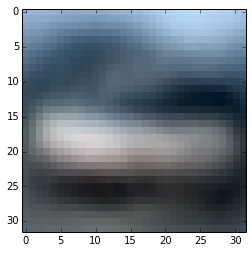

In [301]:
applyAndPrint(all_data_lbls[1][0],pca_1)

The following script inputs all examples of a certain category into the PCA for that category, and finds the total distance between the low-dimensional representations and the original images. This total distance is divided by 5,000, the number of images in each category, to give the average error per image for each class.

In [311]:
# For each category, represent each image using the first 20 components of the category. Compute the average distance
# between an image and its representation for each category.

for i in range(0,10):
# for i in range(0,all_data_lbls.shape[0]):
    all_pcas_lbl = applyPCA(all_data_lbls[i],pcas[i])
    set_dist = np.abs(all_pcas_lbl - all_data_lbls[i])
    set_dist_mean = np.mean(set_dist)
    tot_dist= np.sum(set_dist)
    avg_dist = tot_dist / 5000
    print "Data lost for label",i,": ",avg_dist

    

Data lost for label 0 :  62070.2394062
Data lost for label 1 :  83368.4950071
Data lost for label 2 :  62242.7050035
Data lost for label 3 :  73420.7446061
Data lost for label 4 :  60089.0480585
Data lost for label 5 :  74468.3245622
Data lost for label 6 :  67323.9424265
Data lost for label 7 :  77399.7380194
Data lost for label 8 :  61632.2213916
Data lost for label 9 :  84719.9243174


### Problem 4.10 b

The following code computes the distances between the mean images for each pair of classes.

In [322]:
# ==============
# Problem 4.10 b
# ==============

# (b) Compute the distances between mean images for each pair of classes. Use
# principal coordinate analysis to make a 2D map of the means of each
# categories. For this exercise, compute distances by thinking of the images
# as vectors.

means = curr_total

cls_dists = np.zeros((10,10))
for i in range(0,curr_total.shape[0]-1):
    for j in range(i+1,curr_total.shape[0]):
        cls_dists[i,j] = np.linalg.norm(curr_total[i]-curr_total[j])
        cls_dists[j,i] = np.linalg.norm(curr_total[i]-curr_total[j])
        
innerprods = np.zeros((10,10))        
for i in range(0,10):
    for j in range(0,10):
        innerprods[i][j] = np.dot(means[i],means[j])

We take the eigenvectors corresponding to the two largest eigenvalues of the distance matrix to project the mean distances onto a 2D map. We observe that certain related categories are similar, such as bird and airplane, and automobile and truck.

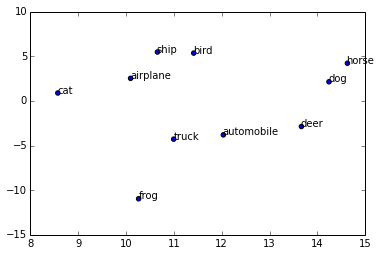

In [366]:
eigval, eigvec = np.linalg.eig(innerprods)
var = eigval
idx = np.argsort(-var)
val = -np.sort(-var)
basis = eigvec[:,idx[0:2]]
var_sqrt = np.sqrt(var[idx[0:2]])
points = basis * var_sqrt
lbl_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.scatter(points[:,0],points[:,1])
for i,lbl in enumerate(lbl_names):
    plt.annotate(lbl, (points[i,0],points[i,1]))

### Problem 4.10 c

In the following code, we perform the same operation as in B, except instead of using the distance between the means of categories, we use the distance metric specified in the problem, namely constructing the 

In [ ]:
# ==============
# Problem 4.10 c
# ==============

# (c) Here is another measure of the similarity of two classes. For class A and
# class B, define E(A → B) to be the average error obtained by representing
# all the images of class A using the mean of class A and the first 20 principal
# components of class B. Now define the similarity between classes to be
# (1/2)(E(A → B)+E(B → A)). Use principal coordinate analysis to make
# a 2D map of the classes. Compare this map to the map in the previous
# exercise – are they different? why?


In [373]:
#reconstruction

adj_data_lbls = np.zeros((10, 10, 5000, 3072))

for curr_lbl in range(0, 10):
    for next_lbl in range(0, 10):
        for i in range(0, 5000):
            xi =  all_data_lbls[curr_lbl][i]
            curr_mean = means[curr_lbl]
            mi = xi - curr_mean
            sums = np.zeros(3072)

            for j in range(0,20):
                sums += (pcas[next_lbl].components_[j].transpose()*mi)*pcas[next_lbl].components_[j]
                
            xi_hat = curr_mean + sums
            adj_data_lbls[curr_lbl][next_lbl][i] = xi_hat

In [376]:
similiarity = np.zeros((10, 10))

for i in range(0,10):
    for j in range(0,10):
        similiarity[i][j] = np.linalg.norm(adj_data_lbls[i][j]-all_data_lbls[i])

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/numpy/core/numeric.py:512: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/text.py:1458: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(x))
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/text.py:1460: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))


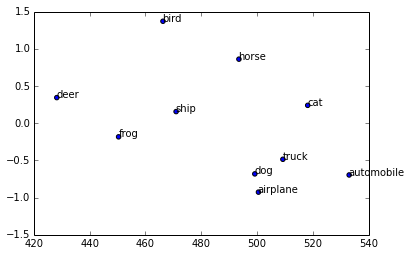

In [377]:
eigval, eigvec = np.linalg.eig(similiarity)
var = eigval
idx = np.argsort(-var)
val = -np.sort(-var)
basis = eigvec[:,idx[0:2]]
var_sqrt = np.sqrt(var[idx[0:2]])
points = basis * var_sqrt
lbl_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.scatter(points[:,0],points[:,1])
for i,lbl in enumerate(lbl_names):
    plt.annotate(lbl, (points[i,0],points[i,1]))